# Observing Run Preparation Module

**Lecturer:** Robert Quimby<br>
**Jupyter Notebook Author:** Shubham Srivastav & Cameron Hummels

This is a Jupyter notebook lesson taken from the GROWTH Winter School 2018.  For other lessons and their accompanying lectures, please see: http://growth.caltech.edu/growth-astro-school-2018-resources.html

## Objective
Demonstrate how to plan observations prior to an observing run.

## Key steps
- Select targets
- Get visibility and airmass plots
- Get moon separation angles
- Calculate exposure times for targets

## Required dependencies

See GROWTH school webpage for detailed instructions on how to install these modules and packages.  Nominally, you should be able to install the python modules with `pip install <module>`.  The external astromatic packages are easiest installed using package managers (e.g., `rpm`, `apt-get`).

### Python modules
* python 3
* astropy
* numpy
* matplotlib
* astroplan
* pytz

### External packages
None

In [15]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
import pytz
%matplotlib inline
from astroplan import Observer, FixedTarget
from astropy.utils.iers import conf
conf.auto_max_age = None
from astroplan import download_IERS_A 
from astropy.coordinates import get_sun, get_moon, get_body
from astroplan import moon_illumination

### Date and Time
- Dates and times are in UTC
- Default time is 00:00:00 UTC (verify this)

In [16]:
date = Time("2018-12-03", format='iso')
print(date)

2018-12-03 00:00:00.000


### What is the current UTC?

In [17]:
now = Time.now()
print(now)
print(now.jd)
print(now.mjd)
print(now.decimalyear)

2023-06-09 10:15:26.960357
2460104.9273953745
60104.4273953745
2023.4367873845877


### Exercise
What time will it be (in UTC) after 1 hour 45 minutes from now? Complete the line below to print it out.

In [18]:
print("In 1 hour and 45 minutes, the time will be {0} UTC".format(now + 1*u.h + 45*u.min))

In 1 hour and 45 minutes, the time will be 2023-06-09 12:00:26.960357 UTC


### Using UT1
- To keep accurate time, the changes in earth's rotation period have to be taken into account.
- AstroPy does this using a convention called UT1, that is tied to the rotation of earth with respect to the position of distant quasars. IERS - International Earth Rotation and Reference Systems Service keeps continuous tabs on the orientation of the earth and updates the data in the IERS bulletin.
Update the bulletin:

In [19]:
download_IERS_A()

### Check to see what observatories are available in the database.

In [20]:
print("Available observatories: \n{0}"
      .format(', '.join(EarthLocation.get_site_names())))

Available observatories: 
ALMA, AO, ARCA, ASKAP, ATA, ATST, Allen Telescope Array, Anderson Mesa, Anglo-Australian Observatory, Apache Point, Apache Point Observatory, Arecibo, Arecibo Observatory, Astroparticle Research with Cosmics in the Abyss, Atacama Large Millimeter Array, Australian Square Kilometre Array Pathfinder, BAO, BBSO, Beijing XingLong Observatory, Big Bear Solar Observatory, Black Moshannon Observatory, CAHA, CAHA, CHARA, CHIME, Canada-France-Hawaii Telescope, Canadian Hydrogen Intensity Mapping Experiment, Catalina Observatory, Catalina Observatory: 61 inch telescope, Centro Astronomico Hispano-Aleman, Almeria, Cerro Pachon, Cerro Paranal, Cerro Tololo, Cerro Tololo Interamerican Observatory, Cima Ekar 182 cm Telescope, Cima Ekar Observing Station, DCT, DKIST, DRAO, DRAO 26m Telescope, Daniel K. Inouye Solar Telescope, Discovery Channel Telescope, Dominion Astrophysical Observatory, Dominion Radio Astrophysical Observatory, Effelsberg, Effelsberg 100-m Radio Telescope

### Setting up observatory location

In [21]:
#Indian Astronomical Observatory is not listed in the database, so let's define the location
longitude = '78d57m53s'
latitude = '32d46m44s'
elevation = 4500 * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)
iaohanle = Observer(location = location, timezone = 'Asia/Kolkata',
                             name = "IAO", description = "GROWTH-India 70cm telescope")
iaohanle

<Observer: name='IAO',
    location (lon, lat, el)=(78.96472222222222 deg, 32.77888888888889 deg, 4499.999999999798 m),
    timezone=<DstTzInfo 'Asia/Kolkata' LMT+5:53:00 STD>>

### Sunset, Sunrise, Midnight

In [22]:
#Calculating the sunset, midnight and sunrise times for our observatory 
#What is astronomical twilight?
sunset_iao = iaohanle.sun_set_time(now, which='nearest')
eve_twil_iao = iaohanle.twilight_evening_astronomical(now, which='nearest')
midnight_iao = iaohanle.midnight(now, which='next')
morn_twil_iao = iaohanle.twilight_morning_astronomical(now, which='next')
sunrise_iao = iaohanle.sun_rise_time(now, which='next')

print("Sunset at IAO will be at {0.iso} UTC".format(sunset_iao))
print("Astronomical evening twilight at IAO will be at {0.iso} UTC".format(eve_twil_iao))
print("Midnight at IAO will be at {0.iso} UTC".format(midnight_iao))
print("Astronomical morning twilight at IAO will be at {0.iso} UTC".format(morn_twil_iao))
print("Sunrise at IAO will be at {0.iso} UTC".format(sunrise_iao))


Sunset at IAO will be at 2023-06-09 13:46:38.069 UTC
Astronomical evening twilight at IAO will be at 2023-06-09 15:32:12.475 UTC
Midnight at IAO will be at 2023-06-09 18:43:22.016 UTC
Astronomical morning twilight at IAO will be at 2023-06-09 21:54:31.234 UTC
Sunrise at IAO will be at 2023-06-09 23:40:06.006 UTC


### Exercise 
Find the effective length of time (in hours) available for astronomical observations at IAO tonight

In [23]:
observing_time = (morn_twil_iao - eve_twil_iao).to(u.h)
print("You can observe for {0:.1f} at IAO tonight".format(observing_time))


You can observe for 6.4 h at IAO tonight


### Local Sidereal Time (LST)

In [24]:
#What is the LST now at IAO Hanle?
#What would the LST be at IAO at local midnight?
lst_now = iaohanle.local_sidereal_time(now)
lst_mid = iaohanle.local_sidereal_time(midnight_iao)
print("LST at IAO now is {0:.2f}".format(lst_now))
print("LST at IAO at local midnight will be {0:.2f}".format(lst_mid))

LST at IAO now is 8.69 hourangle
LST at IAO at local midnight will be 17.18 hourangle


### Choosing targets for observations
Targets can be defined by name or coordinates.


In [25]:
coords = SkyCoord('00h42m41.8s', '+40d51m55.0s', frame='icrs') # coordinates of Andromeda Galaxy (M32) 
m32 = FixedTarget(name = 'M32', coord=coords)
m32.ra.hms

hms_tuple(h=0.0, m=42.0, s=41.799999999999926)

In [26]:
#Check to see if target is up at evening twilight.
#Also check if target is available at midnight and morning twilight.

print(iaohanle.target_is_up(eve_twil_iao, m32))
print(iaohanle.target_is_up(midnight_iao, m32))
print(iaohanle.target_is_up(morn_twil_iao, m32))

False
True
True


In [27]:
#Altitude and Azimuth of target
aa = iaohanle.altaz(eve_twil_iao, m32)
aa.alt.degree, aa.az.degree

(-14.227253311184105, 14.513320381277856)

Checking rise times of targets

In [28]:
m32rise = iaohanle.target_rise_time(now, m32, which = 'next', horizon = 0 * u.deg)
print(m32rise.iso)  #default format is JD

2023-06-09 18:00:35.842


### Defining targets by name

In [29]:
target = FixedTarget.from_name('m51') #Messier 51
target.coord

<SkyCoord (ICRS): (ra, dec) in deg
    (202.469575, 47.1952583)>

### Dealing with moving targets

In [30]:
get_body('jupiter', now)

<SkyCoord (GCRS: obstime=2023-06-09 10:15:26.960357, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (32.95011214, 12.10397002, 5.64767104)>

In [31]:
#get moon position at midnight 
get_moon(midnight_iao)

        Use get_body("moon") instead. [warnings]


<SkyCoord (GCRS: obstime=2460105.2801159243, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (338.22726681, -13.83412779, 0.00246598)>

In [32]:
#How bright is the moon at midnight?
moon_illumination(midnight_iao)

        Use get_body("moon") instead. [astroplan.moon]


0.6185716820298206

In [33]:
#We can turn solar system objects into 'pseudo-fixed' targets to plan observations
saturn_midnight = FixedTarget(name = 'Saturn', coord = get_body('saturn', midnight_iao))
saturn_midnight.coord

<SkyCoord (GCRS: obstime=2460105.2801159243, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (339.14118481, -10.44817912, 9.54082436)>

### Airmass
- Ideally, targets should be observed when they have the least airmass. Airmass ranges from 1 (zenith) to ~38 at the horizon.
- Airmass is 2.0 at alt=30, 2.9 at alt=20 and 3.9 at alt=15 degrees
- As a general rule of thumb, try observing targets when airmass > 2
- Let us find the airmass of M33 at midnight at IAO

In [34]:
#Is the target up at IAO at midnight?
iaohanle.target_is_up(midnight_iao, target)

True

In [35]:
#lets check the alt and az of the target at midnight
target_altaz = iaohanle.altaz(midnight_iao, target)
target_altaz.altaz

<SkyCoord (AltAz: obstime=2460105.2801159243, location=(1028191.03516148, 5272251.01802928, 3435803.52567405) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (305.92570579, 46.48368775)>

That's a good enough elevation to observe the target.

In [36]:
#Find the airmass
target_altaz.secz

<Quantity 1.37897109>

Now we can visualize what we have done so far using some plots

In [37]:
import matplotlib.pyplot as plt
from astroplan.plots import plot_sky, plot_airmass

In [38]:
#position of target at midnight
plot_sky(target, iaohanle, midnight_iao)

TypeError: gca() got an unexpected keyword argument 'projection'

Now let us see how the target moves over the course of the night

In [39]:
t_start = eve_twil_iao
t_end = morn_twil_iao
t_observe = t_start + (t_end - t_start) * np.linspace(0.0, 1.0, 20)
plot_sky(target, iaohanle, t_observe)

TypeError: gca() got an unexpected keyword argument 'projection'

Now let's plot the airmass as a function of time

C:\Users\bveda\AppData\Roaming\Python\Python310\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


(4.0, 0.5)

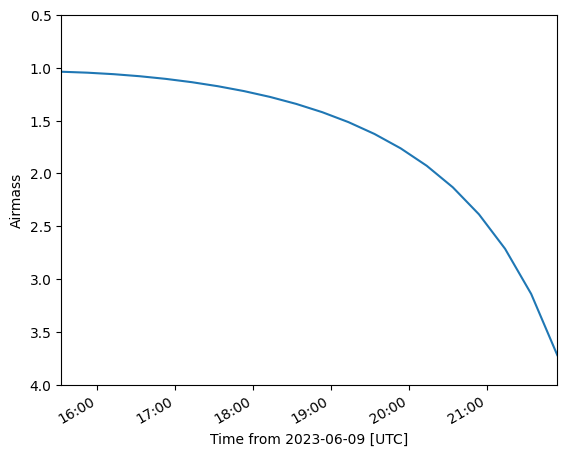

In [40]:
plot_airmass(target, iaohanle, t_observe)
plt.ylim(4,0.5)

The airmass is above 2 for the better part of the night, making M51 a good target to observe from IAO tonight.
Note that the default airmass limit is 3 in astroplan, corresponding to ~19 degrees elevation.

### Finder Charts

In [41]:
from astroplan.plots import plot_finder_image
from astroquery.skyview import SkyView

In [42]:
plot_finder_image(target, fov_radius = 20 * u.arcmin)  #field of view corresponding to the GROWTH-India telesocpe

TypeError: gca() got an unexpected keyword argument 'projection'

Now let's define an array of targets to work with

In [44]:
target_names = ['vega', 'polaris', 'm1', 'm42', 'm55']
targets = [FixedTarget.from_name(target) for target in target_names]
targets

[<FixedTarget "vega" at SkyCoord (ICRS): (ra, dec) in deg (279.23473479, 38.78368896)>,
 <FixedTarget "polaris" at SkyCoord (ICRS): (ra, dec) in deg (37.95456067, 89.26410897)>,
 <FixedTarget "m1" at SkyCoord (ICRS): (ra, dec) in deg (83.6287, 22.0147)>,
 <FixedTarget "m42" at SkyCoord (ICRS): (ra, dec) in deg (83.82, -5.39)>,
 <FixedTarget "m55" at SkyCoord (ICRS): (ra, dec) in deg (294.998792, -30.96475)>]

Which of these targets is up now?

In [45]:
iaohanle.target_is_up(now, targets)

array([False,  True,  True,  True, False])

In [46]:
iaohanle.target_is_up(midnight_iao, targets)

array([ True,  True, False, False,  True])

### Exercise
Find out the times at which the targets rise to an elevation of 10 degrees. Use target_rise_time. 

In [48]:
for target in targets:
    print(iaohanle.target_rise_time(now, target,which= 'nearest', horizon = 10*u.deg).iso)    

2023-06-09 13:12:42.855


C:\Users\bveda\AppData\Roaming\Python\Python310\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\bveda\AppData\Roaming\Python\Python310\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


--
2023-06-09 01:02:46.267
2023-06-09 02:13:56.474
2023-06-09 17:49:22.908


What is the elevation of Vega now?

In [33]:
iaohanle.altaz(now, targets[0])

<SkyCoord (AltAz: obstime=2019-04-02 05:53:06.289935, location=(1028191.03516148, 5272251.01802928, 3435803.52567405) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (299.98263436, 28.28822783)>

Now let's plot the elevation of Vega to see how it varies over the night

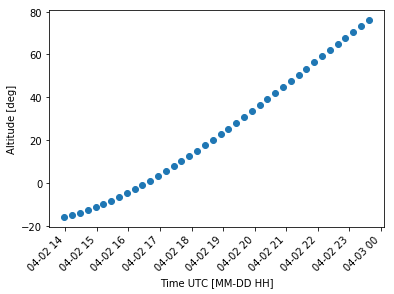

In [34]:
times = (t_start - 0.5 * u.h) + (t_end - t_start + 1 * u.h) * np.linspace(0.0, 1.0, 40)
elevations = iaohanle.altaz(times, targets[0]).alt
ax = plt.gca()
ax.plot_date(times.plot_date, elevations.deg)
ax.set(xlabel = 'Time UTC [MM-DD HH]' ,ylabel = 'Altitude [deg]')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

### Exercise
Plot the altitude as a function of time for tonight for each of the targets in a single plot

No handles with labels found to put in legend.


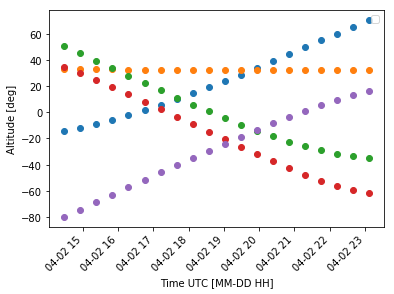

In [35]:
times = t_start + (t_end - t_start) * np.linspace(0.0, 1.0, 20)
elevations = []
for target in targets: 
    elevations.append(iaohanle.altaz(times, target).alt)
  
ax = plt.gca()
for elevation in elevations:
    ax.plot_date(times.plot_date, elevation)
    
ax.set(xlabel = 'Time UTC [MM-DD HH]' ,ylabel = 'Altitude [deg]')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.legend()

### Exercise
Plot sky positions for each target using plot_sky for tonight at IAO in a single plot.

/home/chummels/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The frac parameter was deprecated in version 2.1. Use tick padding via Axes.tick_params instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


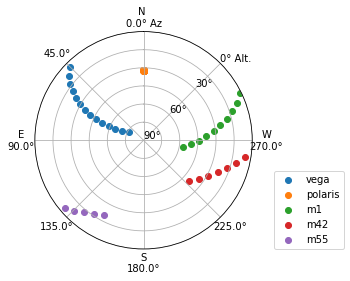

In [36]:
times = (t_start - 0.5 * u.h) + (t_end - t_start + 1 * u.h) * np.linspace(0.0, 1.0, 20)
for target in targets:
    plot_sky(target, iaohanle, times)
plt.legend(loc=[1.1,0])

### Exercise
Plot airmass vs time for each target in targets for tonight at IAO.

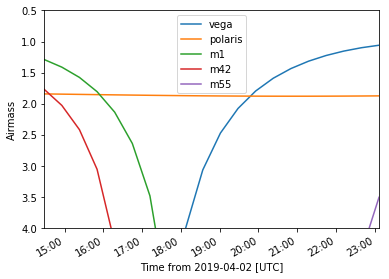

In [37]:
for target in targets:
    plot_airmass(target, iaohanle, t_observe)
plt.ylim(4,0.5)    
plt.legend()

### Observational Constraints
- between civil twilights
- airmass
- altitude limits

In [38]:
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint, MoonSeparationConstraint)
constraints = [AltitudeConstraint(15*u.deg, 84*u.deg),
               AirmassConstraint(3), AtNightConstraint.twilight_civil(), MoonSeparationConstraint(min = 10 * u.deg)]
t_range = Time([t_start - 0.5 * u.hour, t_end + 0.5 * u.hour])

In [39]:
from astroplan import is_observable, is_always_observable, months_observable
# Are targets ever observable in the time range?
ever_observable = is_observable(constraints, iaohanle, targets, time_range=t_range)
print(ever_observable)
# Are targets always observable in the time range?
always_observable = is_always_observable(constraints, iaohanle, targets, time_range=t_range)
print(always_observable)
# During what months are the targets ever observable?
obs_months = months_observable(constraints, iaohanle, targets)

[ True  True  True  True False]
[False  True False False False]


The functions is_observable and ever_observable return boolean arrays. Let's print their output in tabular form.

In [40]:
from astropy.table import Table
observability_table = Table()
observability_table['targets'] = [target.name for target in targets]
observability_table['ever_observable'] = ever_observable
observability_table['always_observable'] = always_observable
print(observability_table)

targets ever_observable always_observable
------- --------------- -----------------
   vega            True             False
polaris            True              True
     m1            True             False
    m42            True             False
    m55           False             False


Or we could do this directly using the observability_table function 

In [41]:
from astroplan import observability_table
table = observability_table(constraints, iaohanle, targets, time_range = t_range)
print(table)

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
       vega            True             False                         0.5
    polaris            True              True                         1.0
         m1            True             False                         0.3
        m42            True             False                         0.2
        m55           False             False                         0.0


### Exercise
- Create a list of your favourite targets and store it in a text file with 3 columns - name, RA and Dec. Or you could    use 'targetlists.txt' which already contains a list of targets. 
- Read the text file, and store the targets as FixedTarget objects.
- Get observability tables for all the targets for different moon separation angles (10, 20, 30... degrees)
- Plot airmass and sky position as a function of time for tonight for all your targets.

In [42]:
from astropy.io import ascii
table = ascii.read('data/targetlist.txt')
targets = [FixedTarget(coord=SkyCoord(ra=ra*u.deg, dec=dec*u.deg), name=name) for name, ra, dec in table]
#The recipe for the remaining part of the exercise is in the previous solved exercises